<a href="https://colab.research.google.com/github/cal546/DSPS_CAdkins/blob/main/hw5/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pylab as plt
import pandas as pd

In [ ]:
lin_data = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW5/hbl2017.csv')

In [ ]:
lin_data

,#ID,x,y,σy,σx,ρxy
0,1,201,592,61,9,-0.84
1,2,244,401,25,4,0.31
2,3,47,583,38,11,0.64
3,4,287,402,15,7,-0.27
4,5,203,495,21,5,-0.33
5,6,58,173,15,9,0.67
6,7,210,479,27,4,-0.02
7,8,202,504,14,4,-0.05
8,9,198,510,30,11,-0.84
9,10,158,416,16,7,-0.69


In [ ]:
Y1 = lin_data.y[5:]
A1 = np.transpose(np.vstack((np.ones(len(lin_data.x)-5), lin_data.x[5:])))
C1 = np.diag(lin_data.σy[5:]**2)

In [ ]:
X1 = np.linalg.inv(np.transpose(A1) @ np.linalg.inv(C1) @ A1) @ np.transpose(A1) @ np.linalg.inv(C1) @ Y1

In [ ]:
minx = min(lin_data.x[5:])
maxx = max(lin_data.x[5:])
x = np.linspace(minx,maxx)
y = X1[1] * x + X1[0]

In [ ]:
Chi_sqr = np.transpose(Y1-A1@X1)@(np.linalg.inv(C1))@(Y1-A1@X1)

y = 2.23x + 34.85 has a χ^2 0f 18.58


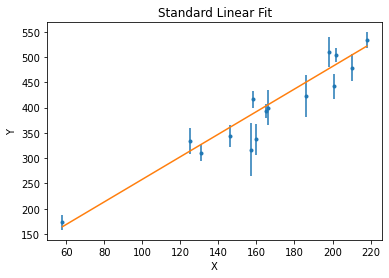

In [ ]:
plt.errorbar(lin_data.x[5:],lin_data.y[5:],yerr=lin_data.σy[5:],fmt='.')
plt.plot(x,y)
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Standard Linear Fit')
print('y = {:.2f}x + {:.2f} has a χ^2 of {:.2f}'.format(X1[1],X1[0],Chi_sqr))

In [ ]:
Y2 = lin_data.y[:]
A2 = np.transpose(np.vstack((np.ones(len(lin_data.x)), lin_data.x[:])))
C2 = np.diag(lin_data.σy[:]**2)

In [ ]:
X2 = np.linalg.inv(np.transpose(A2) @ np.linalg.inv(C2) @ A2) @ np.transpose(A2) @ np.linalg.inv(C2) @ Y2

In [ ]:
min2x = min(lin_data.x[:])
max2x = max(lin_data.x[:])
x2 = np.linspace(min2x,max2x)
y2 = X2[1] * x2 + X2[0]

In [ ]:
Chi_sqr2 = np.transpose(Y2-A2@X2)@(np.linalg.inv(C2))@(Y2-A2@X2)

y = 1.08x + 213.27 has a χ^2 0f 289.96


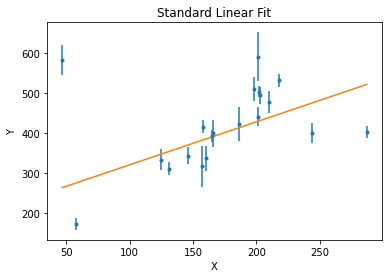

In [ ]:
plt.errorbar(lin_data.x[:],lin_data.y[:],yerr=lin_data.σy[:],fmt='.')
plt.plot(x2,y2)
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Standard Linear Fit All data')
print('y = {:.2f}x + {:.2f} has a χ^2 of {:.2f}'.format(X2[1],X2[0], Chi_sqr2))

In this data set including the first 5 data points, there exists greater outliers in the data set, forcing our line fit to be much less representative of the data and causing our Chi squared 

In [ ]:
Y3 = lin_data.y[:]
A3 = np.transpose(np.vstack((np.ones(len(lin_data.x)), lin_data.x[:], lin_data.x[:]**2)))
C3 = np.diag(lin_data.σy[:]**2)

In [ ]:
X3 = np.linalg.inv(np.transpose(A3) @ np.linalg.inv(C3) @ A3) @ np.transpose(A3) @ np.linalg.inv(C3) @ Y3

In [ ]:
min3x = min(lin_data.x[:])
max3x = max(lin_data.x[:])
x3 = np.linspace(min3x,max3x)
y3 = X3[2] * x3**2 + X3[1] * x3 + X3[0]

In [ ]:
Chi_sqr3 = np.transpose(Y3-A3@X3)@(np.linalg.inv(C3))@(Y3-A3@X3)

y = -0.01x^2 + 3.72x + 18.85 has a χ^2 0f 218.49


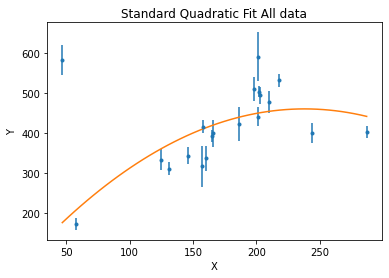

In [ ]:
plt.errorbar(lin_data.x[:],lin_data.y[:],yerr=lin_data.σy[:],fmt='.')
plt.plot(x3,y3)
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Standard Quadratic Fit All data')
print('y = {:.2f}x^2 + {:.2f}x + {:.2f} has a χ^2 of {:.2f}'.format(X3[2],X3[1],X3[0], Chi_sqr3))

Here, making our fit line a quadratic has reduced our chi square value by a substantial amount, from 298.96 to now 218.49.